In [14]:
import praw
import pandas as pd

reddit = praw.Reddit(
    client_id="WGuzkfEXN60mXFgbGTpZ1w",
    client_secret="d7dUhHYyiVJABVN0_hpYjjJ6klZmMw",
    user_agent="MyApp/0.0.1"
)

def scrape_reddit(query, max_posts):
    posts = []
    for submission in reddit.subreddit("all").search(query, limit=max_posts):
        posts.append([submission.created_utc, submission.title, submission.selftext])
    df = pd.DataFrame(posts, columns=["Date", "Title", "Content"])
    df["FullText"] = df["Title"] + " " + df["Content"]
    return df

iphone_df = scrape_reddit("iPhone 15", 1000)
samsung_df = scrape_reddit("Samsung S24 Ultra", 1000)

iphone_df.to_csv("iphone15_reddit.csv", index=False)
samsung_df.to_csv("samsung_s24ultra_reddit.csv", index=False)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [15]:
samsung_df.head(5)

,Date,Title,Content,FullText
0,1.726092e+09,Don't buy a galaxy S24 Ultra until you read this,"I have a galaxy S24 Ultra, I got it less than ...",Don't buy a galaxy S24 Ultra until you read th...
1,1.739514e+09,S24 Ultra Might Be My Last Samsung Phone,I have been a Samsung note user since Note 3 N...,S24 Ultra Might Be My Last Samsung Phone I hav...
2,1.733909e+09,Finally got my S24 Ultra!,Medyo kabado pa kasi paid via card buti na lan...,Finally got my S24 Ultra! Medyo kabado pa kasi...
3,1.718102e+09,I regret buying the Galaxy S24 Ultra.,Because I should've bought the Plus instead. ...,I regret buying the Galaxy S24 Ultra. Because ...
4,1.737918e+09,S24 Ultra and S25 Ultra,Quick picture comparison of the two devices si...,S24 Ultra and S25 Ultra Quick picture comparis...


In [5]:
!pip install textblob
from textblob import TextBlob

In [18]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

iphone_df["Sentiment"] = iphone_df["FullText"].apply(analyze_sentiment)
samsung_df["Sentiment"] = samsung_df["FullText"].apply(analyze_sentiment)

iphone_df.to_csv("iphone15_sentiment.csv", index=False)
samsung_df.to_csv("samsung_s24ultra_sentiment.csv", index=False)

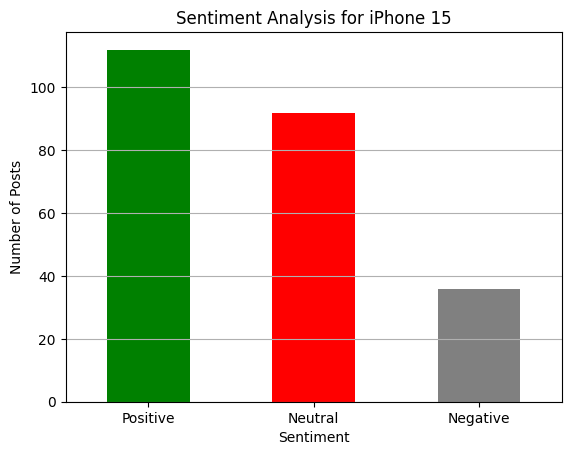

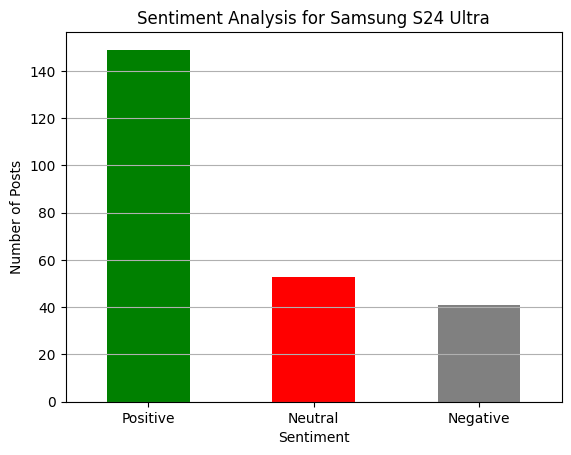

In [19]:
import matplotlib.pyplot as plt

def plot_sentiment(df, title):
    sentiment_counts = df["Sentiment"].value_counts()
    sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
    plt.title(f"Sentiment Analysis for {title}")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Posts")
    plt.xticks(rotation=0)
    plt.grid(axis="y")
    plt.show()

plot_sentiment(iphone_df, "iPhone 15")
plot_sentiment(samsung_df, "Samsung S24 Ultra")

In [21]:
print("iPhone 15 Sentiment Breakdown:")
print(iphone_df["Sentiment"].value_counts(normalize=True) * 100)

print("\nSamsung S24 Ultra Sentiment Breakdown:")
print(samsung_df["Sentiment"].value_counts(normalize=True) * 100)

iPhone 15 Sentiment Breakdown:
Sentiment
Positive    46.666667
Neutral     38.333333
Negative    15.000000
Name: proportion, dtype: float64

Samsung S24 Ultra Sentiment Breakdown:
Sentiment
Positive    61.316872
Neutral     21.810700
Negative    16.872428
Name: proportion, dtype: float64


In [22]:
iphone_df["Device"] = "iPhone 15"
samsung_df["Device"] = "Samsung S24 Ultra"

combined_df = pd.concat([iphone_df, samsung_df])
combined_df.to_csv("combined_sentiment.csv", index=False)